In [1]:
#packages
import numpy as np
import dask.dataframe as dd
import sys
#read in the two datasets    
Training = dd.read_csv('train.csv')
Ideal = dd.read_csv ('ideal.csv')

#merge in dask
    
merged_dd = Training.merge (Ideal, on = ['x'])
    

In [2]:
#merging of the datasets using dask
Training = dd.read_csv('train.csv')
Ideal = dd.read_csv ('ideal.csv')
    
merged_dd = Training.merge (Ideal, on = ['x'])

In [3]:
merged_dd.head()

,x,y1_x,y2_x,y3_x,y4_x,y1_y,y2_y,y3_y,y4_y,y5,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,40.215690,0.755265,19.881090,800.02094,-0.912945,0.408082,9.087055,5.408082,-9.087055,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,40.379227,0.809859,20.308237,791.93540,-0.867644,0.497186,9.132356,5.497186,-9.132356,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,39.607777,1.246826,20.367115,784.16560,-0.813674,0.581322,9.186326,5.581322,-9.186326,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,39.252636,0.775174,19.370686,776.31165,-0.751573,0.659649,9.248426,5.659649,-9.248426,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,39.924540,0.185780,19.780146,768.57574,-0.681964,0.731386,9.318036,5.731386,-9.318036,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902


In [4]:
var = merged_dd
print(sys.getsizeof(var))

48


In [5]:
from datetime import datetime

In [6]:
#time taken to perform the merge using dask
start_time = datetime.now()

mergedDask = Training.merge (Ideal, on = ['x'])

time_elapsed = datetime.now() - start_time

print ('Time elapsed (hh:mm:ss.ms){}'.format(time_elapsed))

Time elapsed (hh:mm:ss.ms)0:00:00.048995


In [7]:
def merge_in_dask():

    #packages
    import numpy as np
    import pandas as pd

    #read in two data sets to merge
    Training = dd.read_csv('train.csv')
    Ideal = dd.read_csv ('ideal.csv')

    #merge in dask
    
    merged_dd = Training.merge (Ideal, on = ['x'])
    
if __name__ == '__main__':
    merge_in_dask()

In [8]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt

In [22]:
%%time
df = pd.read_csv('train.csv')
type(df)

CPU times: total: 15.6 ms
Wall time: 9 ms


pandas.core.frame.DataFrame

In [23]:
%%time
df = dd.read_csv('train.csv')
type(df)

CPU times: total: 0 ns
Wall time: 4.13 ms


dask.dataframe.core.DataFrame

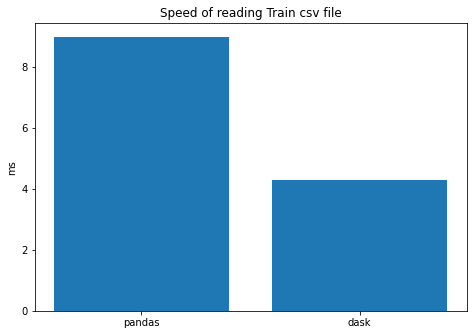

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('ms')
ax.set_title('Speed of reading Train csv file')
lib = ['pandas', 'dask']
perf = [9,4.3]
ax.bar(lib,perf)
plt.show()

In [26]:
import pandas as pd
from dask import dataframe as dd 

df = pd.DataFrame(
    {"Age": [30, 28, 32, 40, 25, 36, 75, 52, 64, 76], "Names": ["Conroy", "Dexter", "Reid", "Viv", "Pilosio", "Giefer", "Florance", "Marcia", "Carol", "Hubert"]}
)
ddf = dd.from_pandas(df, npartitions=2)

In [27]:
for i in range(ddf.npartitions):
    print(ddf.partitions[i].compute())

   Age    Names
0   30   Conroy
1   28   Dexter
2   32     Reid
3   40      Viv
4   25  Pilosio
   Age     Names
5   36    Giefer
6   75  Florance
7   52    Marcia
8   64     Carol
9   76    Hubert


In [28]:
ddf.partitions[0].memory_usage(deep=True).compute()

Age       40
Index    128
Names    311
dtype: int64

In [29]:
ddf.memory_usage_per_partition(deep=True).compute()

0    479
1    488
dtype: int64

In [30]:
import pandas as pd
df = pd.DataFrame(
    {"Age": [30, 28, 32, 40, 25, 36, 75, 52, 64, 76], "Names": ["Conroy", "Dexter", "Reid", "Viv", "Pilosio", "Giefer", "Florance", "Marcia", "Carol", "Hubert"]}
)
print(df)

   Age     Names
0   30    Conroy
1   28    Dexter
2   32      Reid
3   40       Viv
4   25   Pilosio
5   36    Giefer
6   75  Florance
7   52    Marcia
8   64     Carol
9   76    Hubert


In [31]:
df.memory_usage(deep=True)

Index    128
Age       80
Names    627
dtype: int64

In [18]:
ddf = dd.read_parquet(
    "s3://coiled-datasets/timeseries/20-years/parquet",
    storage_options={"anon": True, 'use_ssl': True}
)
ddf.memory_usage_per_partition(deep=True).compute()

0       57061027
1       57060857
2       57059768
3       57059342
4       57060737
          ...   
1090    57059834
1091    57061111
1092    57061001
1093    57058404
1094    57061989
Length: 1095, dtype: int64

SyntaxError: invalid syntax (1718703573.py, line 7)